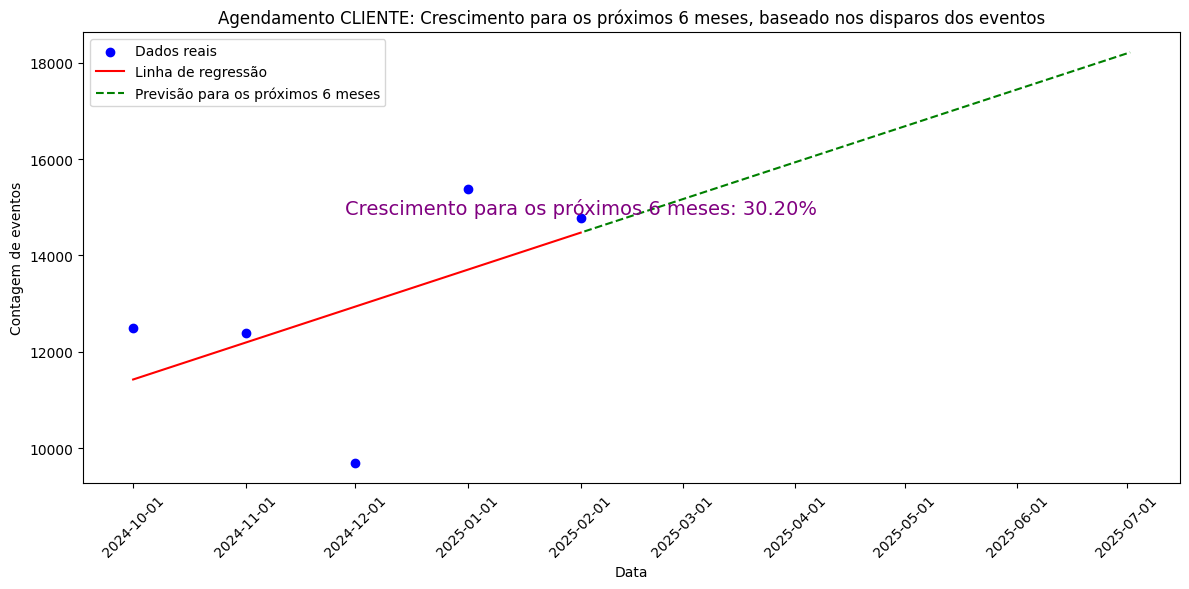

Previsão para 2025-02-02: 14497.29 eventos
Previsão para 2025-03-04: 15241.10 eventos
Previsão para 2025-04-03: 15984.91 eventos
Previsão para 2025-05-03: 16728.72 eventos
Previsão para 2025-06-02: 17472.53 eventos
Previsão para 2025-07-02: 18216.34 eventos


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

# URL do arquivo CSV raw
url = 'https://raw.githubusercontent.com/josebrandao/matematica-aplicada-com-python/main/REGRESSAO%20LINEAR/dataset_teste.csv'

# Carregar os dados diretamente do GitHub
df = pd.read_csv(url)

# Remover espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Converter a coluna 'Date' para o formato de data
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H')  # Ajuste o formato conforme necessário

# Ordenar os dados por data
df = df.sort_values(by='Date')

# Agrupar os dados por mês, pegando a soma para cada mês
df['Month'] = df['Date'].dt.to_period('M')  # Extrair o mês e o ano
df_monthly = df.groupby('Month').agg({'Event count': 'sum'}).reset_index()

# Calcular a coluna 'Dias' como a diferença entre cada mês e o primeiro mês
data_inicio = df_monthly['Month'].min().start_time
df_monthly['Dias'] = (df_monthly['Month'].dt.start_time - data_inicio).dt.days

# Regressão linear
model = LinearRegression()
model.fit(df_monthly[['Dias']], df_monthly['Event count'])

# Gerar previsões para os próximos 6 meses (aproximadamente 6 meses a partir do último dado)
dias_futuros = np.array(range(df_monthly['Dias'].max() + 1, df_monthly['Dias'].max() + 1 + 180, 30)).reshape(-1, 1)  # Aproximadamente 30 dias por mês

# Ajustar a estrutura de 'dias_futuros' para ser um DataFrame com o nome da coluna 'Dias'
dias_futuros_df = pd.DataFrame(dias_futuros, columns=['Dias'])

# Fazer a previsão com o modelo
previsao_futura = model.predict(dias_futuros_df)

# Convertendo os dias futuros para datas a partir da data inicial
futura_datas = pd.to_datetime(dias_futuros.flatten(), origin=data_inicio, unit='D')

# Plotando os dados reais vs as previsões
plt.figure(figsize=(12, 6))  # Tornar o gráfico mais largo e legível
plt.scatter(df_monthly['Month'].dt.start_time, df_monthly['Event count'], color='blue', label='Dados reais')

# Linha de regressão (dados reais vs previsão)
plt.plot(df_monthly['Month'].dt.start_time, model.predict(df_monthly[['Dias']]), color='red', label='Linha de regressão')

# Plotando a previsão para os próximos 6 meses
plt.plot(futura_datas, previsao_futura, color='green', linestyle='--', label='Previsão para os próximos 6 meses')

# Ajustando o formato da data no eixo X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotacionar os rótulos do eixo X para melhor legibilidade
plt.xticks(rotation=45)

# Títulos e legendas
plt.xlabel('Data')
plt.ylabel('Contagem de eventos')
plt.title('Agendamento CLIENTE: Crescimento para os próximos 6 meses, baseado nos disparos dos eventos')

# Adicionando o percentual de crescimento no gráfico
slope = model.coef_[0]  # Coeficiente angular da linha de regressão
percentual_crescimento_6_meses = (slope * 180) / df_monthly['Event count'].iloc[-1] * 100
plt.text(df_monthly['Month'].dt.start_time.iloc[-1], df_monthly['Event count'].iloc[-1], 
         f'Crescimento para os próximos 6 meses: {percentual_crescimento_6_meses:.2f}%', 
         color='purple', fontsize=14, ha='center', va='bottom')

plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

# Imprimir as previsões para os próximos 6 meses
for i, pred in enumerate(previsao_futura[:6]):
    print(f"Previsão para {futura_datas[i].strftime('%Y-%m-%d')}: {pred:.2f} eventos")
